# Overview
* Understanding the shape of the data(histograms,box plot.etc..)
* Data Cleaning
* Data Exploration
* Feature Engineering
* Data Processing for Model
* Basic Model Building
* Model Tuning
* Ensemble Model Building
* Result

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Checking Missing Values in entire data set

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Visaulising the Missing values
import missingno

<AxesSubplot:>

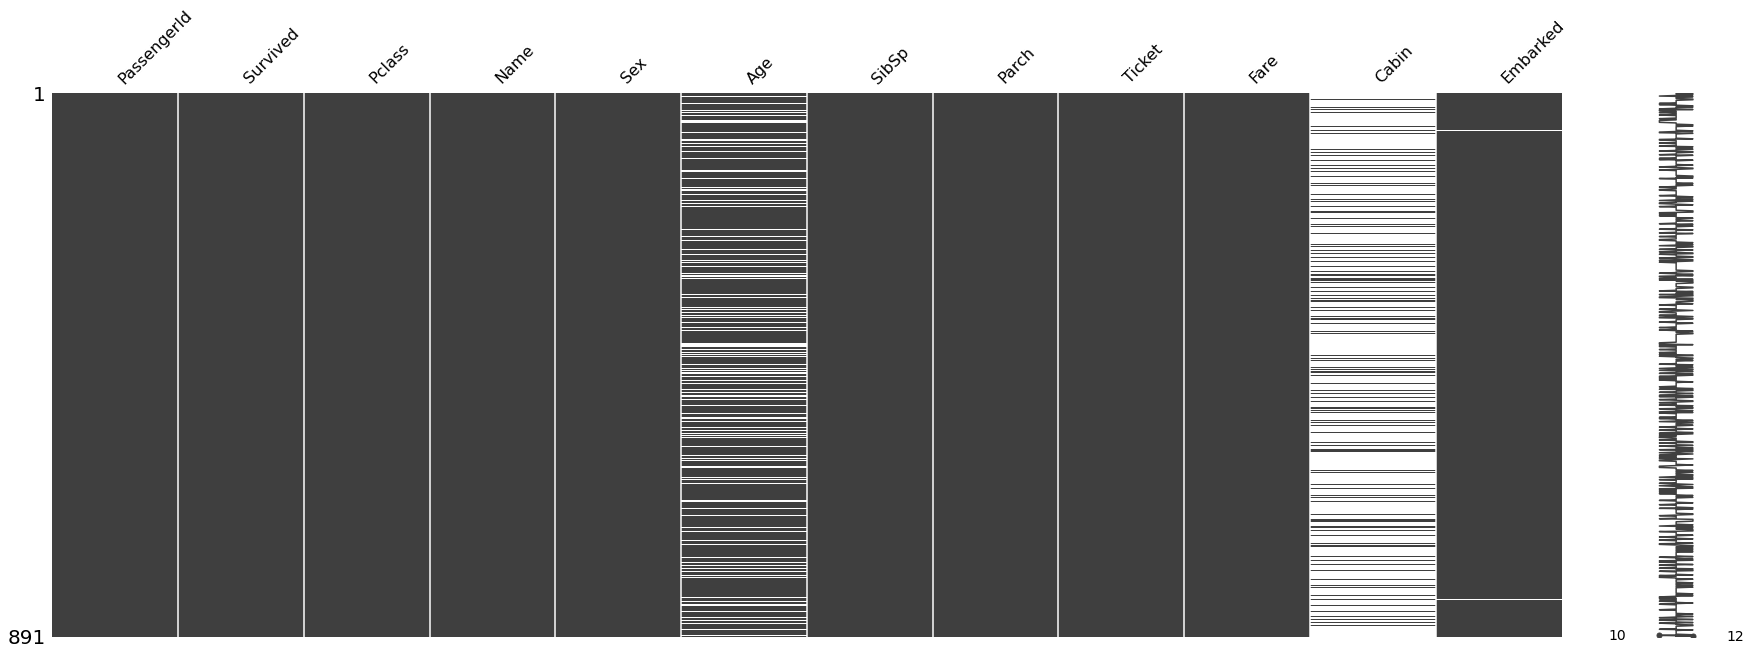

In [7]:
# Plot graphic of missing values
missingno.matrix(train, figsize = (30,10))

In [8]:
#train['train_test'] = 1
#To add a new column in the data set we use this

## What datatypes are in the dataframe?

As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints (numbers) could be considered numerical features.

However, as we dig deeper, we might find features which are numerical may actually be categorical.

The goal for the next few steps is to figure out how best to process the data so our machine learning model can learn from it.

Ideally, all the features will be encoded into a numerical value of some kind. 

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 1.Numerical Values

In [10]:
train[['PassengerId','Pclass','Age','SibSp','Parch','Fare']].isnull().sum()

PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

# 2.Categorical 

In [11]:
train[['Name','Sex','Ticket','Cabin','Embarked']].isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

# Checking the missing values by percentage of mean

In [12]:
train.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [13]:
train.shape

(891, 12)

In [14]:
# Checking the values inthe data set which having less than 5% missing values
low_miss = [val for val in train.columns if train[val].isnull().mean() < 0.05 and train[val].isnull().mean() > 0]
low_miss

['Embarked']

In [15]:
# Its a Categorical data
train[low_miss].sample(5)

,Embarked
141,S
427,S
670,S
161,S
858,C


In [16]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Checking the Percentage of the data is remained

In [17]:
len(train[low_miss].dropna())/len(train)

0.9977553310886644

# Visualising Old and New dataframe

In [18]:
new_train = train[low_miss].dropna()
new_train.shape

(889, 1)

In [19]:
train.shape

(891, 12)

In [20]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Embarked'>

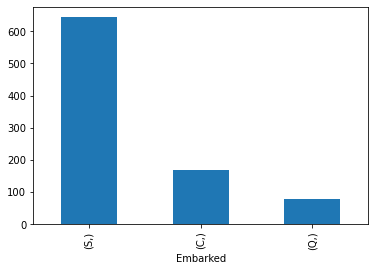

In [21]:
new_train.value_counts().plot(kind='bar')

# 1.Mode value to 'Embarked' Column

In [25]:
train['Embarked'].mode()

0    S
dtype: object

In [26]:
train['Embarked'].fillna('S',inplace = True)

In [27]:
temporary = train[train['Embarked'] == 'S']['Survived']

Text(0.5, 1.0, 'Embarked')

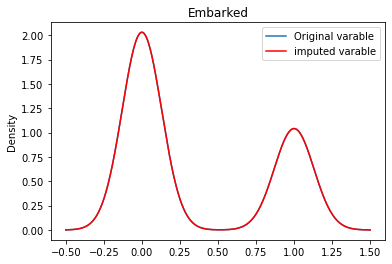

In [28]:
fig = plt.figure()
axes = fig.add_subplot(111)

temporary.plot(kind = 'kde', ax= axes)

train[train['Embarked'] == 'S']['Survived'].plot(kind= 'kde',ax=axes,color = 'red')

lines, labels = axes.get_legend_handles_labels()
labels = ['Original varable' , 'imputed varable']
axes.legend(lines , labels,loc= 'best')

plt.title('Embarked')

In [29]:
train.shape

(891, 12)

In [30]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# 2.Cabin Collumn

In [31]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [32]:
train['Cabin'].isnull().sum()

687

In [33]:
train['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
C22 C26        3
              ..
F E69          1
C110           1
E17            1
D45            1
B50            1
Name: Cabin, Length: 147, dtype: int64

In [34]:
train['Cabin'].value_counts().unique()

array([4, 3, 2, 1], dtype=int64)

In [35]:
train['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

### If we use this kind of equation still we get null values so we replace with index number

In [36]:
#train['Cabin'].fillna(train['Cabin'].mode()).isnull().sum()

In [37]:
# So we use this method
new_cabin = train['Cabin'].fillna(train['Cabin'].mode()[0])

In [38]:
new_cabin.isnull().sum()

0

In [39]:
new_cabin.value_counts()

B96 B98        691
C23 C25 C27      4
G6               4
E101             3
C22 C26          3
              ... 
F E69            1
C110             1
E17              1
D45              1
B50              1
Name: Cabin, Length: 147, dtype: int64

In [40]:
new_cabin.shape

(891,)

* Still we can change another method

In [41]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [42]:
train.Cabin.isnull().sum()

687

In [43]:
train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Cabin, Length: 891, dtype: int64

In [44]:
train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' '))).value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin, dtype: int64

In [45]:
train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' '))).value_counts().unique()

array([687, 180,  16,   6,   2], dtype=int64)

In [46]:
train['Cabin'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' '))).isnull().sum()

In [47]:
train['Cabin'].isnull().sum()

0

In [48]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [49]:
train.shape

(891, 12)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


# 2.Numeric values : 'Age' Column is a "NumericData"

In [51]:
train['Age'].isnull().sum()

177

In [52]:
train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

In [53]:
train['Age'].value_counts().unique()

array([30, 27, 26, 25, 24, 23, 22, 20, 18, 17, 15, 14, 13, 12, 11, 10,  9,
        8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

# 1.Filling missing values with Mean and Meadian

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
X = train.drop(columns = 'Survived')
y = train['Survived']

In [60]:
X_train.shape, X_test.shape

((712, 11), (179, 11))

In [61]:
X_train.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.207865
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.000000
Embarked       0.000000
dtype: float64

In [62]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

In [63]:
mean_age

29.78590425531915

In [64]:
median_age

28.75

* Replacing wiht "Mean" and "Median" values

In [83]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

<ipython-input-83-e42c49c78a55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_median'] = X_train['Age'].fillna(median_age)
<ipython-input-83-e42c49c78a55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_mean'] = X_train['Age'].fillna(mean_age)


* Replacing wiht Orbitary values

# 2.Replacing Orbitary values 

In [84]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

<ipython-input-84-9c7dfee22c3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_99'] = X_train['Age'].fillna(99)
<ipython-input-84-9c7dfee22c3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_minus1'] = X_train['Age'].fillna(-1)


# 3.Replacing the Random Values

In [97]:
X_train['Age_imputed'] = X_train['Age']

<ipython-input-97-486dc8508d78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_imputed'] = X_train['Age']


In [99]:
# Finding Null values in the data set
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [101]:
# Filling Missing values with sample Orginal values
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] =X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values


<ipython-input-101-ce7a27a5ec7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] =X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [103]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([16.  , 17.  ,  2.  , 40.  , 24.  ,  0.83, 26.  ,  6.  , 39.  ,
       48.  , 32.  , 29.  , 35.  , 29.  , 28.  , 18.  , 21.  , 24.  ,
       57.  , 18.  , 23.  , 20.  , 33.  , 22.  , 32.  , 30.  , 50.  ,
       16.  , 48.  , 47.  , 61.  , 65.  , 36.  , 22.  , 18.  , 39.  ,
       13.  , 28.  ,  9.  , 11.  , 27.  , 27.  , 32.  , 27.  , 33.  ,
       16.  , 42.  , 26.  , 33.  , 19.  , 38.  , 28.  , 24.  , 10.  ,
       19.  , 18.  , 28.  , 28.  , 28.  , 30.  ,  4.  , 32.  ,  8.  ,
       33.  , 29.  , 18.  , 37.  , 25.  , 14.  , 26.  , 18.  , 26.  ,
       26.  , 21.  , 38.  , 21.  , 31.  , 23.  , 27.  , 34.  , 21.  ,
       33.  , 25.  , 16.  , 20.  , 26.  , 45.  , 51.  , 30.5 ,  7.  ,
       39.  , 20.  , 47.  ,  4.  , 49.  , 41.  , 42.  , 16.  , 40.  ,
       16.  , 18.  , 22.  , 32.  , 25.  , 23.  , 26.  , 25.  , 36.  ,
       14.5 , 52.  , 24.  ,  1.  , 16.  , 24.  ,  6.  , 25.  , 32.  ,
       14.  , 22.  , 33.  , 21.  ,  5.  , 36.  , 20.  , 27.  , 20.  ,
        9.  , 39.  ,

In [104]:
X_train['Age'].isnull().sum()

148

In [114]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_mean,Age_99,Age_minus1,Age_imputed
30,31,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,0,C,40.0,40.0,40.0,40.0,40.0
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,0,S,4.0,4.0,4.0,4.0,4.0
873,874,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,0,S,47.0,47.0,47.0,47.0,47.0
182,183,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,0,S,9.0,9.0,9.0,9.0,9.0
876,877,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,0,S,20.0,20.0,20.0,20.0,20.0


# 4.Replacing for Numeric values Knn_Imputator

In [115]:
from sklearn.impute import KNNImputer,SimpleImputer

In [107]:
X_train.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_mean,Age_99,Age_minus1,Age_imputed
659,660,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.275,0,C,58.00,58.000000,58.0,58.0,58.0
166,167,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.000,0,S,28.75,29.785904,99.0,-1.0,26.0
724,725,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.100,0,S,27.00,27.000000,27.0,27.0,27.0
214,215,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.750,0,Q,28.75,29.785904,99.0,-1.0,30.0
181,182,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.050,0,C,28.75,29.785904,99.0,-1.0,40.0


# Checking " Variance" of the Age Column

In [108]:
print('Original Age variable variance: ', X_train['Age'].var())
print()
# replacing the 'Mean' and 'Median' values
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())
print()
# replacing the Orbitary Columns

print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())
print()

#replacing Random Samples in the data
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original Age variable variance:  204.3495133904614

Age Variance after median imputation:  161.9895663346054
Age Variance after mean imputation:  161.81262452718673

Age Variance after 99 wala imputation:  951.7275570187172
Age Variance after -1 wala imputation:  318.0896202624484

Variance after random imputation:  211.96170897454155


* There is so much diffrence b/w Original and after appling mean and median we will check further

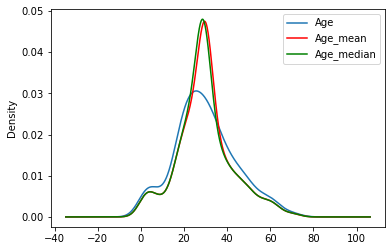

In [91]:
fig = plt.figure()
ax= fig.add_subplot(111)

# Original variable distribution
X_train['Age'].plot(kind = 'kde' , ax = ax)

#Variable imputed with mean
X_train['Age_mean'].plot(kind='kde',ax=ax,color = 'red')

#Variable imputed with Median
X_train['Age_median'].plot(kind='kde',ax=ax,color = 'green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

* Replacing the 'Mean' and 'Medain' values

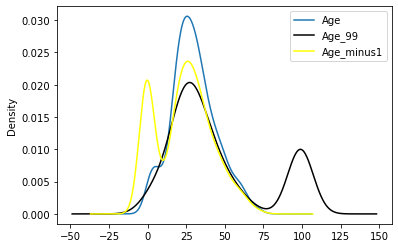

In [92]:
fig = plt.figure()
ax= fig.add_subplot(111)

# Original variable distribution
X_train['Age'].plot(kind = 'kde' , ax = ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='black')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='yellow')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

* There is lot more diffrence in the data by replacing the 'Orbitary' values

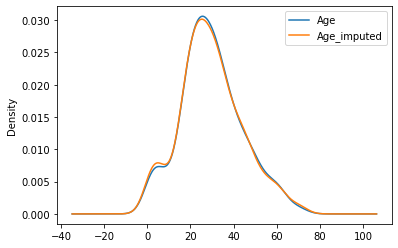

In [109]:
fig = plt.figure()
ax= fig.add_subplot(111)

# Original variable distribution
X_train['Age'].plot(kind = 'kde' , ax = ax)

# replacing the Random values in the age column
X_train['Age_imputed'].plot(kind = 'kde',ax=ax)


# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

* Almost similar to the data but slightly higher than the 'Original

# Checking the Co_Varience

In [111]:
# Check only the "Age" Column
X_train.cov()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,Age_median,Age_mean,Age_99,Age_minus1,Age_imputed
PassengerId,67083.511868,-1.530927,44.696863,-19.213776,2.116239,288.248615,0.0,37.097298,35.392875,-78.488425,86.046412,22.811154
Pclass,-1.530927,0.702784,-4.566284,0.099283,0.023681,-22.791180,0.0,-3.680637,-3.615778,0.717828,-5.543333,-3.696311
Age,44.696863,-4.566284,204.349513,-4.165283,-2.333618,71.512440,0.0,204.349513,204.349513,204.349513,204.349513,204.349513
SibSp,-19.213776,0.099283,-4.165283,1.267996,0.379281,8.567003,0.0,-3.311738,-3.298248,-2.396963,-3.699133,-3.124633
Parch,2.116239,0.023681,-2.333618,0.379281,0.708695,8.280261,0.0,-1.800826,-1.847858,-4.990324,-0.450113,-1.856043
Fare,288.248615,-22.791180,71.512440,8.567003,8.280261,2368.246832,0.0,58.986531,56.626587,-101.053412,126.761454,54.283177
Cabin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Age_median,37.097298,-3.680637,204.349513,-3.311738,-1.800826,58.986531,0.0,161.989566,161.812625,149.990232,167.071135,161.937827
Age_mean,35.392875,-3.615778,204.349513,-3.298248,-1.847858,56.626587,0.0,161.812625,161.812625,161.812625,161.812625,161.812625
Age_99,-78.488425,0.717828,204.349513,-2.396963,-4.990324,-101.053412,0.0,149.990232,161.812625,951.727557,-189.535540,153.447179


# Checking the Co_Relation

In [112]:
X_train.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,Age_median,Age_mean,Age_99,Age_minus1,Age_imputed
PassengerId,1.000000,-0.007051,0.011997,-0.065879,0.009706,0.022869,NaN,0.011254,0.010742,-0.009823,0.018627,0.006049
Pclass,-0.007051,1.000000,-0.380253,0.105173,0.033555,-0.558653,NaN,-0.344960,-0.339066,0.027756,-0.370753,-0.302851
Age,0.011997,-0.380253,1.000000,-0.309514,-0.182537,0.095814,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
SibSp,-0.065879,0.105173,-0.309514,1.000000,0.400103,0.156335,NaN,-0.231075,-0.230260,-0.069000,-0.184190,-0.190595
Parch,0.009706,0.033555,-0.182537,0.400103,1.000000,0.202116,NaN,-0.168073,-0.172557,-0.192151,-0.029979,-0.151436
Fare,0.022869,-0.558653,0.095814,0.156335,0.202116,1.000000,NaN,0.095235,0.091475,-0.067310,0.146049,0.076617
Cabin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_median,0.011254,-0.344960,1.000000,-0.231075,-0.168073,0.095235,NaN,1.000000,0.999454,0.382000,0.736009,0.873929
Age_mean,0.010742,-0.339066,1.000000,-0.230260,-0.172557,0.091475,NaN,0.999454,1.000000,0.412335,0.713233,0.873730
Age_99,-0.009823,0.027756,1.000000,-0.069000,-0.192151,-0.067310,NaN,0.382000,0.412335,1.000000,-0.344476,0.341644


# Checking the Outliers for the 'Age' Column

<AxesSubplot:>

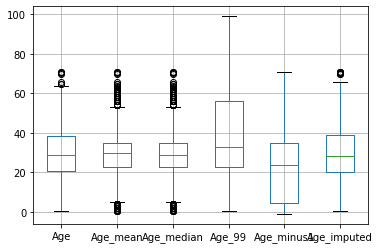

In [113]:
X_train[['Age','Age_mean','Age_median','Age_99','Age_minus1','Age_imputed']].boxplot()

* Here we are getting lot "Outlier" in the dataset while appling 'Mean' and 'Median' values
* And while appling 'Orbitary' values the data gets vary
* While replacing Random values slightly data changes